## Bases de datos AirBNB

Dataset de AirBNB obtenido con una muestra de los últimos 365 días hasta la fecha reportada (29/1/2025). El datset contiene información procesada de distintos lugares ofrecidos para alquiler temporario.

El dataset se baja desde: https://insideairbnb.com/get-the-data/. La ventaja en este caso es que muchas de las columnas se describen en esta planilla: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596 , lo cuál es una ventaja en el análisis de datos. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
import warnings


warnings.filterwarnings('ignore')

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

1. Importación del dataset

In [1]:
# Se carga el dataset
file_path = "./datasets/listings.csv"
airbnb_df = pd.read_csv(file_path)

NameError: name 'pd' is not defined

## EDA (Exploratory Data Analysis)


### 1. Dimensiones

In [ ]:
airbnb_df.shape

(35172, 79)

### 2. Seleccion de columnas relevantes

In [ ]:
# Info del dataset

airbnb_df.shape
airbnb_df.head()
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

### Descrición de las columnas del dataset
#### 📄 Diccionario de Datos para `listings.csv` (Inside Airbnb)

| Campo                         | Tipo de Dato | Calculado | Descripción                                                                                                   |
|-------------------------------|--------------|-----------|---------------------------------------------------------------------------------------------------------------|
| `id`                          | entero       |           | Identificador único de Airbnb para el anuncio.                                                                |
| `listing_url`                 | texto        | ✔️        | URL del anuncio en Airbnb.                                                                                    |
| `scrape_id`                   | bigint       | ✔️        | Identificador del "scrape" de Inside Airbnb al que pertenece este anuncio.                                    |
| `last_scraped`                | datetime     | ✔️        | Fecha y hora en UTC en que se recopiló la información del anuncio.                                            |
| `source`                      | texto        |           | Fuente del anuncio: "neighbourhood search" (búsqueda por vecindario) o "previous scrape" (scrape anterior).   |
| `name`                        | texto        |           | Nombre del anuncio.                                                                                           |
| `description`                 | texto        |           | Descripción detallada del anuncio.                                                                            |
| `neighborhood_overview`       | texto        |           | Descripción del vecindario proporcionada por el anfitrión.                                                    |
| `picture_url`                 | texto        |           | URL de la imagen del anuncio alojada en Airbnb.                                                               |
| `host_id`                     | entero       |           | Identificador único de Airbnb para el anfitrión.                                                              |
| `host_url`                    | texto        | ✔️        | Página de Airbnb del anfitrión.                                                                               |
| `host_name`                   | texto        |           | Nombre del anfitrión, usualmente solo el nombre de pila.                                                      |
| `host_since`                  | fecha        |           | Fecha en que el anfitrión se registró en Airbnb.                                                              |
| `host_location`               | texto        |           | Ubicación proporcionada por el anfitrión.                                                                     |
| `host_about`                  | texto        |           | Descripción sobre el anfitrión.                                                                               |
| `host_response_time`          | texto        |           | Tiempo de respuesta del anfitrión.                                                                            |
| `host_response_rate`          | texto        |           | Tasa de respuesta del anfitrión.                                                                              |
| `host_acceptance_rate`        | texto        |           | Tasa de aceptación de solicitudes de reserva por parte del anfitrión.                                         |
| `host_is_superhost`           | booleano     |           | Indica si el anfitrión es un "superhost" (`t`=verdadero; `f`=falso).                                          |
| `host_thumbnail_url`          | texto        |           | URL de la imagen en miniatura del anfitrión.                                                                  |
| `host_picture_url`            | texto        |           | URL de la imagen del anfitrión.                                                                               |
| `host_neighbourhood`          | texto        |           | Vecindario del anfitrión.                                                                                     |
| `host_listings_count`         | texto        |           | Número de anuncios que tiene el anfitrión (según cálculos desconocidos de Airbnb).                           |
| `host_total_listings_count`   | texto        |           | Número total de anuncios que tiene el anfitrión (según cálculos desconocidos de Airbnb).                      |
| `host_verifications`          | texto        |           | Métodos de verificación del anfitrión.                                                                        |
| `host_has_profile_pic`        | booleano     |           | Indica si el anfitrión tiene foto de perfil (`t`=verdadero; `f`=falso).                                       |
| `host_identity_verified`      | booleano     |           | Indica si la identidad del anfitrión ha sido verificada (`t`=verdadero; `f`=falso).                           |
| `neighbourhood`               | texto        |           | Vecindario del anuncio.                                                                                       |
| `neighbourhood_cleansed`      | texto        | ✔️        | Vecindario geocodificado utilizando latitud y longitud contra archivos de forma digitales públicos.           |
| `neighbourhood_group_cleansed`| texto        | ✔️        | Grupo de vecindarios geocodificado utilizando latitud y longitud contra archivos de forma digitales públicos. |
| `latitude`                    | numérico     |           | Latitud utilizando el sistema de proyección WGS84.                                                            |
| `longitude`                   | numérico     |           | Longitud utilizando el sistema de proyección WGS84.                                                           |
| `property_type`               | texto        |           | Tipo de propiedad seleccionado por el anfitrión.                                                              |
| `room_type`                   | texto        |           | Tipo de habitación: "Entire home/apt" (Alojamiento entero), "Private room" (Habitación privada), "Shared room" (Habitación compartida), "Hotel". |
| `accommodates`                | entero       |           | Capacidad máxima del alojamiento.                                                                             |
| `bathrooms`                   | numérico     |           | Número de baños en el alojamiento.                                                                            |
| `bathrooms_text`              | texto        |           | Descripción textual del número de baños en el alojamiento.                                                    |


In [ ]:
# Ver % de nulos por columna
missing_percent = airbnb_df.isnull().mean().sort_values(ascending=False) * 100
missing_sorted = missing_percent[missing_percent > 0]
print(missing_sorted)


neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
license                          98.891163
neighbourhood                    52.837484
neighborhood_overview            52.837484
host_about                       46.318094
host_neighbourhood               38.243489
host_location                    21.474468
review_scores_value              16.379506
review_scores_accuracy           16.379506
review_scores_communication      16.376663
review_scores_checkin            16.376663
review_scores_cleanliness        16.376663
review_scores_location           16.376663
reviews_per_month                16.376663
review_scores_rating             16.376663
last_review                      16.376663
first_review                     16.376663
host_response_rate               12.023769
host_response_time               12.023769
host_acceptance_rate             10.553850
price                            10.161492
estimated_revenue_l365d          10.161492
bathrooms  

In [ ]:
# Hacer una copia del df original
df_eda = airbnb_df.copy()

In [ ]:
# Filtramos las columnas con menos de 40% de nulos
# Justificacion: Usamos un umbral de 40% porque las columnas con mayor % de nulos pueden producir sesgo
valid_cols = missing_percent[missing_percent < 40].index
df_eda = df_eda[valid_cols]
df_eda.head()

,host_neighbourhood,host_location,review_scores_value,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_location,reviews_per_month,review_scores_rating,last_review,first_review,host_response_rate,host_response_time,host_acceptance_rate,price,estimated_revenue_l365d,bathrooms,beds,host_is_superhost,has_availability,description,bedrooms,bathrooms_text,host_identity_verified,host_verifications,host_total_listings_count,host_listings_count,host_picture_url,host_thumbnail_url,host_since,host_name,host_has_profile_pic,picture_url,availability_365,number_of_reviews_l30d,number_of_reviews,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,number_of_reviews_ltm,calculated_host_listings_count,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,calculated_host_listings_count_entire_homes,instant_bookable,calendar_last_scraped,id,availability_90,room_type,scrape_id,last_scraped,source,name,host_id,host_url,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,availability_60,listing_url,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,amenities
0,Palermo,"New York, NY",4.86,4.93,4.98,4.93,4.88,4.93,0.29,4.82,2025-01-26,2012-07-02,100%,within an hour,79%,"$67,518.00",2025540.0,1.0,1.0,t,t,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,1.0,1 bath,t,"['email', 'phone']",2.0,1.0,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,2009-10-01,Candela,t,https://a0.muscache.com/pictures/19357696/b1de...,300,1,44,0,0,5,1,271,4,30,1,f,2025-01-30,11508,25,Entire home/apt,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,42762,https://www.airbnb.com/users/show/42762,Palermo,-34.581840,-58.424150,Entire condo,2,4,https://www.airbnb.com/rooms/11508,3,1125,3,3,1125,1125,3.0,1125.0,4,"[""Bathtub"", ""Air conditioning"", ""Bed linens"", ..."
1,NaN,"Buenos Aires, Argentina",4.75,4.76,4.90,4.82,4.77,4.87,0.80,4.77,2025-01-18,2012-07-10,100%,within an hour,100%,"$22,375.00",2506000.0,1.0,1.0,f,t,Beautiful cozy apartment in excellent location...,1.0,1 bath,t,"['email', 'phone']",16.0,7.0,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,2016-08-03,María,t,https://a0.muscache.com/pictures/4695637/bbae8...,44,1,123,0,0,8,6,44,8,112,6,f,2025-01-30,14222,44,Entire home/apt,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,https://www.airbnb.com/users/show/87710233,Palermo,-34.586170,-58.410360,Entire rental unit,2,43,https://www.airbnb.com/rooms/14222,7,40,7,7,1125,1125,7.0,1125.0,13,"[""Bathtub"", ""Air conditioning"", ""TV"", ""Heating..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,1 bath,f,[],2.0,2.0,https://a0.muscache.com/defaults/user_pic-225x...,https://a0.muscache.com/defaults/user_pic-50x5...,2009-12-02,Monica,f,https://a0.muscache.com/pictures/91166/c0fdcb4...,0,0,0,0,1,0,1,0,0,0,0,f,2025-01-30,15074,0,Private room,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,59338,https://www.airbnb.com/users/show/59338,Nuñez,-34.538920,-58.465990,Private room in rental unit,1,0,https://www.airbnb.com/rooms/15074,29,730,29,29,730,730,29.0,730.0,0,"[""Washer"", ""Air conditioning"", ""Dryer"", ""TV wi..."
3,Monserrat,"Buenos Aires, Argentina",4.41,4.59,4.80,4.83,4.29,4.39,0.27,4.28,2019-11-30,2011-03-04,95%,within an hour,94%,"$52,511.00",0.0,1.0,1.0,t,t,NaN,1.0,1 bath,t,"['email', 'phone']",13.0,11.0,https://a0.muscache.com/im/pictures/user/bdeda...,https://a0.muscache.com/im/pictures/user/bdeda...,2009-12-21,Elbio Mariano,t,https://a0.muscache.com/pictures/619c33a9-0618...,365,0,45,0,0,0,9,336,0,0,9,t,2025-01-30,16695,90,Entire home/apt,20250129142212,2025-01-30,city scrape,DUPL

In [ ]:
# Columnas relevantes después de ver el estado del dataframe
# Justificación: Esto en base a la info anterior, ver n_unique y en base a eso si son variables numéricas o categóricas que pueden ayudar en el análisis
relevant_columns = [
    'host_id', 'price', 'room_type', 'property_type', 'neighbourhood_cleansed',
    'accommodates', 'bedrooms', 'beds',
    'minimum_nights', 'maximum_nights', 'availability_365',
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
    'review_scores_value', 'reviews_per_month', 'instant_bookable', 'latitude', 'longitude']

df_eda = df_eda[[col for col in relevant_columns if col in df_eda.columns]].copy()

df_eda.info()

# Ver % de nulos por columna
missing_percent = df_eda.isnull().mean().sort_values(ascending=False) * 100
missing_sorted = missing_percent[missing_percent > 0]
print(missing_sorted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      35172 non-null  int64  
 1   price                        31598 non-null  object 
 2   room_type                    35172 non-null  object 
 3   property_type                35172 non-null  object 
 4   neighbourhood_cleansed       35172 non-null  object 
 5   accommodates                 35172 non-null  int64  
 6   bedrooms                     34445 non-null  float64
 7   beds                         31604 non-null  float64
 8   minimum_nights               35172 non-null  int64  
 9   maximum_nights               35172 non-null  int64  
 10  availability_365             35172 non-null  int64  
 11  number_of_reviews            35172 non-null  int64  
 12  review_scores_rating         29412 non-null  float64
 13  review_scores_ac

### 2. Inspección inicial del dataframe

Corrección y ajuste de datos

In [ ]:
# Limpieza del df

# Convertir price a float
df_eda['price'] = df_eda['price'].replace('[\$,]', '', regex=True).astype(float)

# Aproximar al siguiente entero más cercano
df_eda['bedrooms'] = df_eda['bedrooms'].apply(lambda x: np.ceil(x) if pd.notnull(x) else x)
df_eda['beds'] = df_eda['beds'].apply(lambda x: np.ceil(x) if pd.notnull(x) else x)

# Conversion booleanos
bool_map = {'t': True, 'f': False}
df_eda['instant_bookable'] = df_eda['instant_bookable'].map(bool_map)

# Categóricas
df_eda['host_id'] = df_eda['host_id'].astype('category')
df_eda['room_type'] = df_eda['room_type'].astype('category')
df_eda['property_type'] = df_eda['property_type'].astype('category')
df_eda['neighbourhood_cleansed'] = df_eda['neighbourhood_cleansed'].astype('category')
df_eda['instant_bookable']= df_eda['instant_bookable'].astype('category')

df_eda.head()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_id                      35172 non-null  category
 1   price                        31598 non-null  float64 
 2   room_type                    35172 non-null  category
 3   property_type                35172 non-null  category
 4   neighbourhood_cleansed       35172 non-null  category
 5   accommodates                 35172 non-null  int64   
 6   bedrooms                     34445 non-null  float64 
 7   beds                         31604 non-null  float64 
 8   minimum_nights               35172 non-null  int64   
 9   maximum_nights               35172 non-null  int64   
 10  availability_365             35172 non-null  int64   
 11  number_of_reviews            35172 non-null  int64   
 12  review_scores_rating         29412 non-null  float64 
 13  r

Revisar la correlación entre columnas 'review' para seleccionar las más determinantes

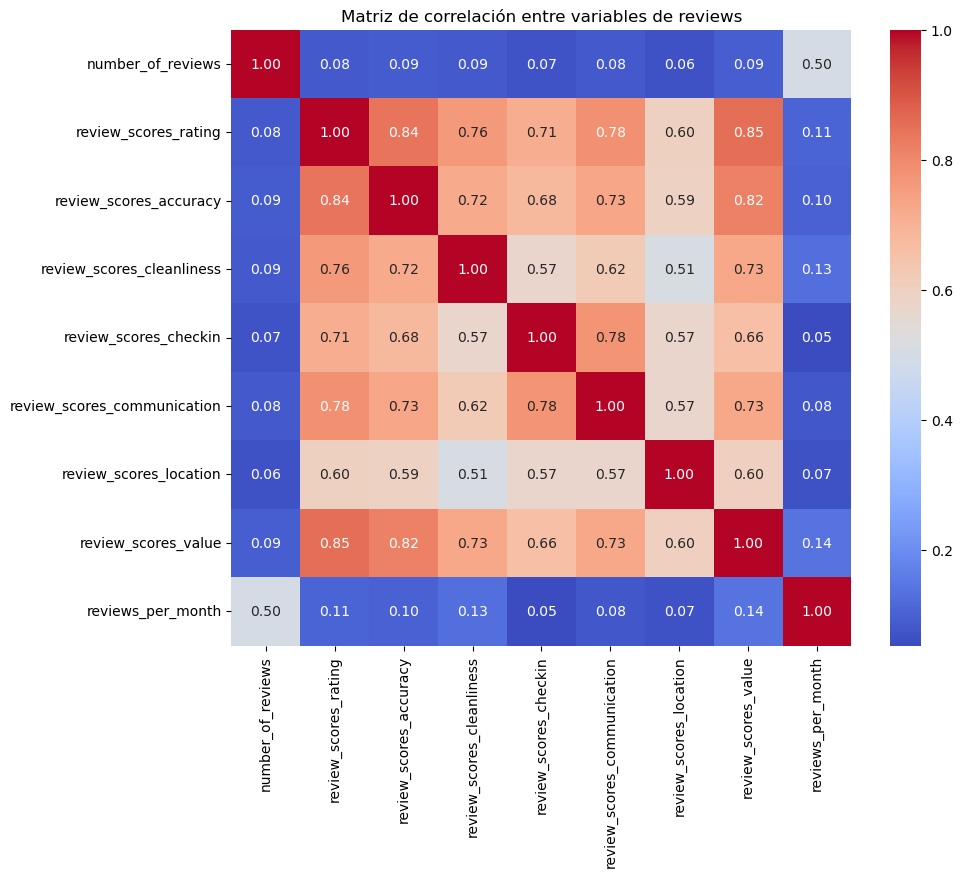

In [ ]:
review_cols = [col for col in df_eda.columns if 'review' in col]
corr = df_eda[review_cols].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables de reviews')
plt.show()

In [ ]:
# Eliminamos las columnas review_scores_accuracy y review_scores_value porque representan casi el mismo valor que review_scores_rating

high_corr_review_cols = ['review_scores_accuracy', 'review_scores_value']
df_eda.drop(columns=high_corr_review_cols, inplace=True)
df_eda.head()

,host_id,price,room_type,property_type,neighbourhood_cleansed,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,instant_bookable,latitude,longitude
0,42762,67518.0,Entire home/apt,Entire condo,Palermo,2,1.0,1.0,3,1125,300,44,4.82,4.88,4.93,4.98,4.93,0.29,False,-34.581840,-58.424150
1,87710233,22375.0,Entire home/apt,Entire rental unit,Palermo,2,1.0,1.0,7,40,44,123,4.77,4.77,4.82,4.90,4.87,0.80,False,-34.586170,-58.410360
2,59338,NaN,Private room,Private room in rental unit,Nuñez,1,NaN,NaN,29,730,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-34.538920,-58.465990
3,64880,52511.0,Entire home/apt,Entire loft,Monserrat,4,1.0,1.0,2,1125,365,45,4.28,4.29,4.83,4.80,4.39,0.27,True,-34.614390,-58.376110
4,75891,113360.0,Entire home/apt,Entire rental unit,Palermo,4,2.0,2.0,2,365,209,330,4.93,4.87,4.94,4.93,4.93,1.84,False,-34.581848,-58.441605


Ver estado del dataframe

                        columna      tipo  nulos (%)  n_unique
12         review_scores_rating   float64  16.376663       135
17            reviews_per_month   float64  16.376663       797
16       review_scores_location   float64  16.376663       120
15  review_scores_communication   float64  16.376663       128
14        review_scores_checkin   float64  16.376663       124
13    review_scores_cleanliness   float64  16.376663       151
1                         price   float64  10.161492      4091
7                          beds   float64  10.144433        31
6                      bedrooms   float64   2.066985        22
0                       host_id  category   0.000000     17820
19                     latitude   float64   0.000000     21644
18             instant_bookable  category   0.000000         2
10             availability_365     int64   0.000000       366
11            number_of_reviews     int64   0.000000       383
9                maximum_nights     int64   0.000000   

<AxesSubplot: >

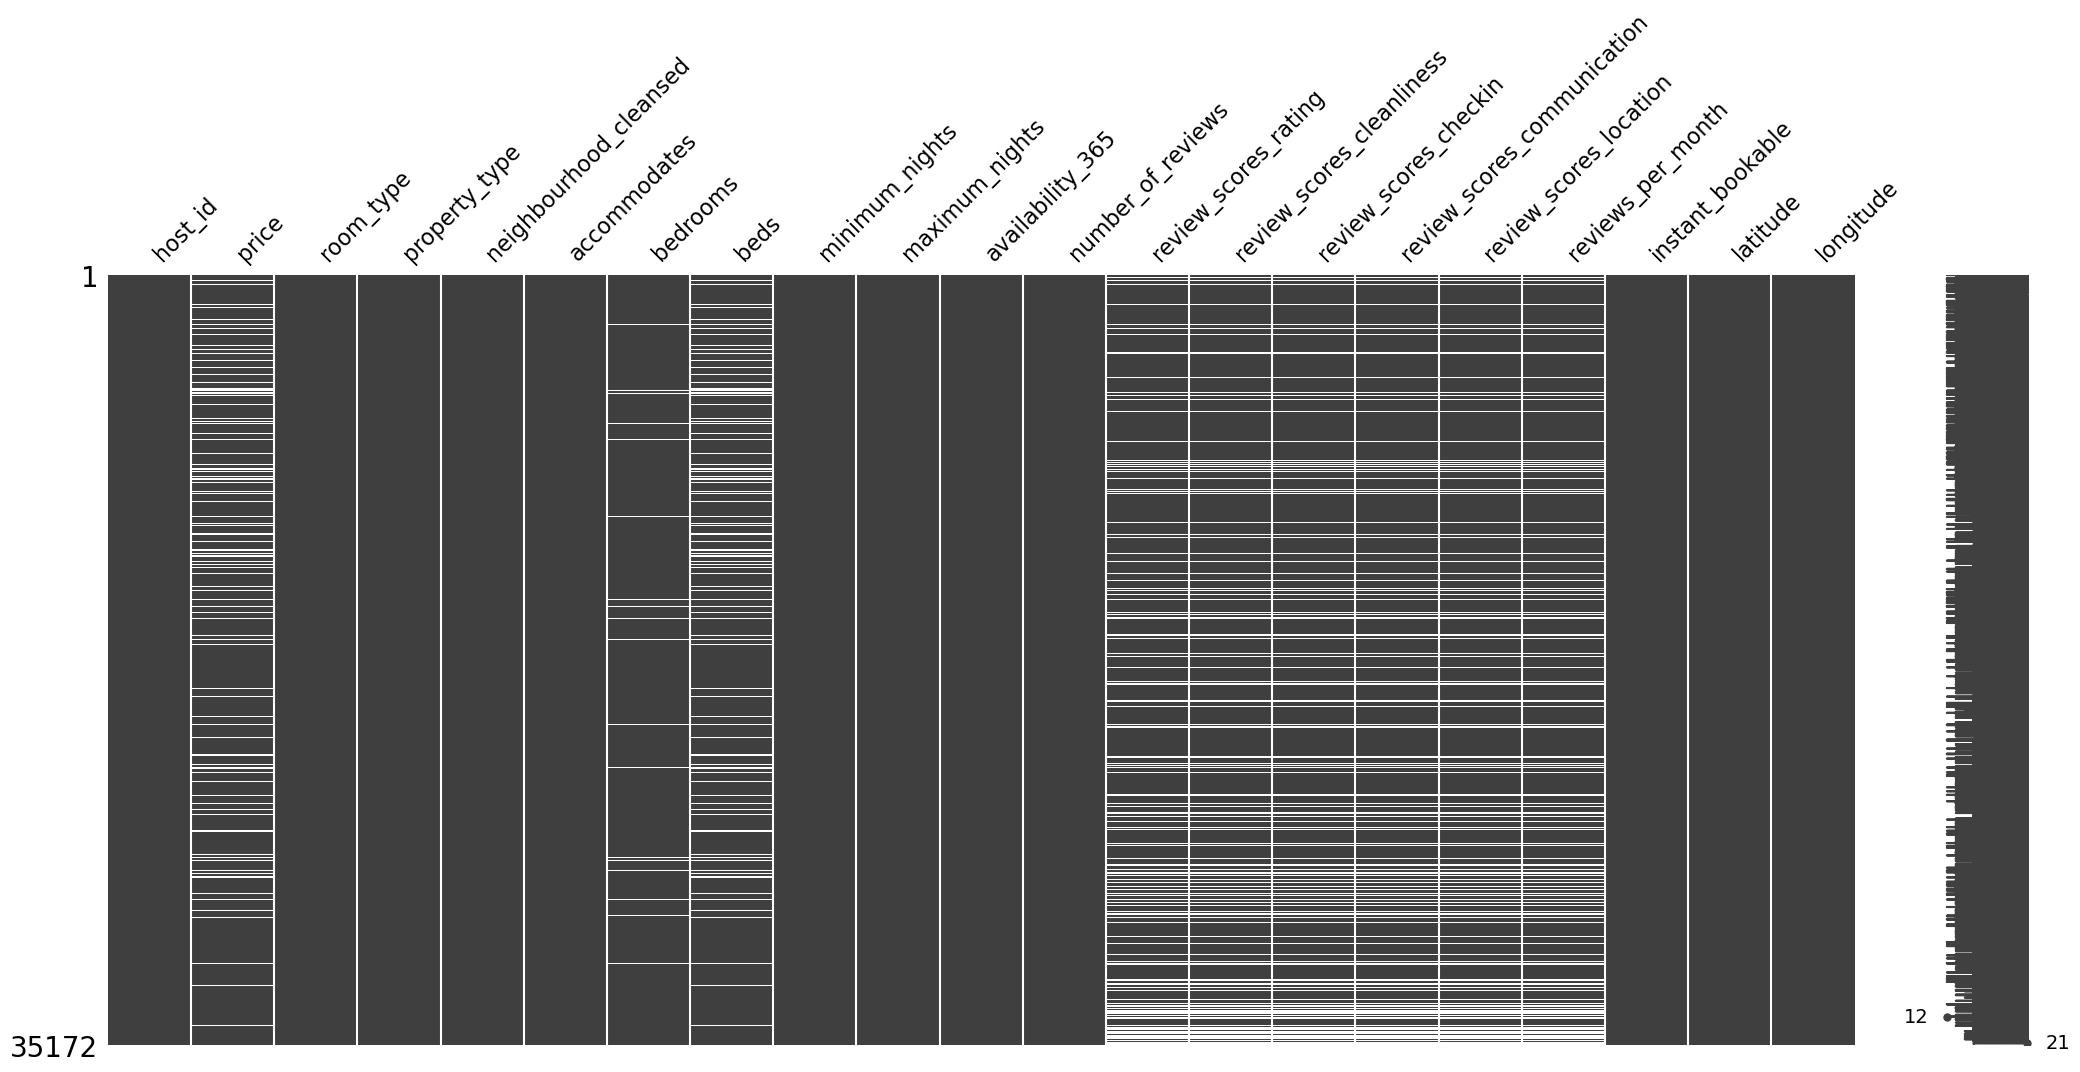

In [ ]:
# Información del dataframe 
df_info = pd.DataFrame({
    'columna': df_eda.columns,
    'tipo': df_eda.dtypes.values,
    'nulos (%)': df_eda.isnull().mean().values * 100,
    'n_unique': [df_eda[col].nunique() for col in df_eda.columns]
})
df_info = df_info.sort_values(by='nulos (%)', ascending=False)
print(df_info)

msno.matrix(df_eda)

### 3. Limpieza del dataframe


Estrategia:
  - Eliminar outliers de columnas críticas
  - Imputar cuando la columna es < 20% (todas) y la variable tiene una distribucion estadística (esto es, que permite imputar un valor estadístico)
  - Eliminar las filas que contienen nulos en columnas críticas después de la imputación

In [ ]:
df_clean = df_eda.copy()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_id                      35172 non-null  category
 1   price                        31598 non-null  float64 
 2   room_type                    35172 non-null  category
 3   property_type                35172 non-null  category
 4   neighbourhood_cleansed       35172 non-null  category
 5   accommodates                 35172 non-null  int64   
 6   bedrooms                     34445 non-null  float64 
 7   beds                         31604 non-null  float64 
 8   minimum_nights               35172 non-null  int64   
 9   maximum_nights               35172 non-null  int64   
 10  availability_365             35172 non-null  int64   
 11  number_of_reviews            35172 non-null  int64   
 12  review_scores_rating         29412 non-null  float64 
 13  r

Outliers

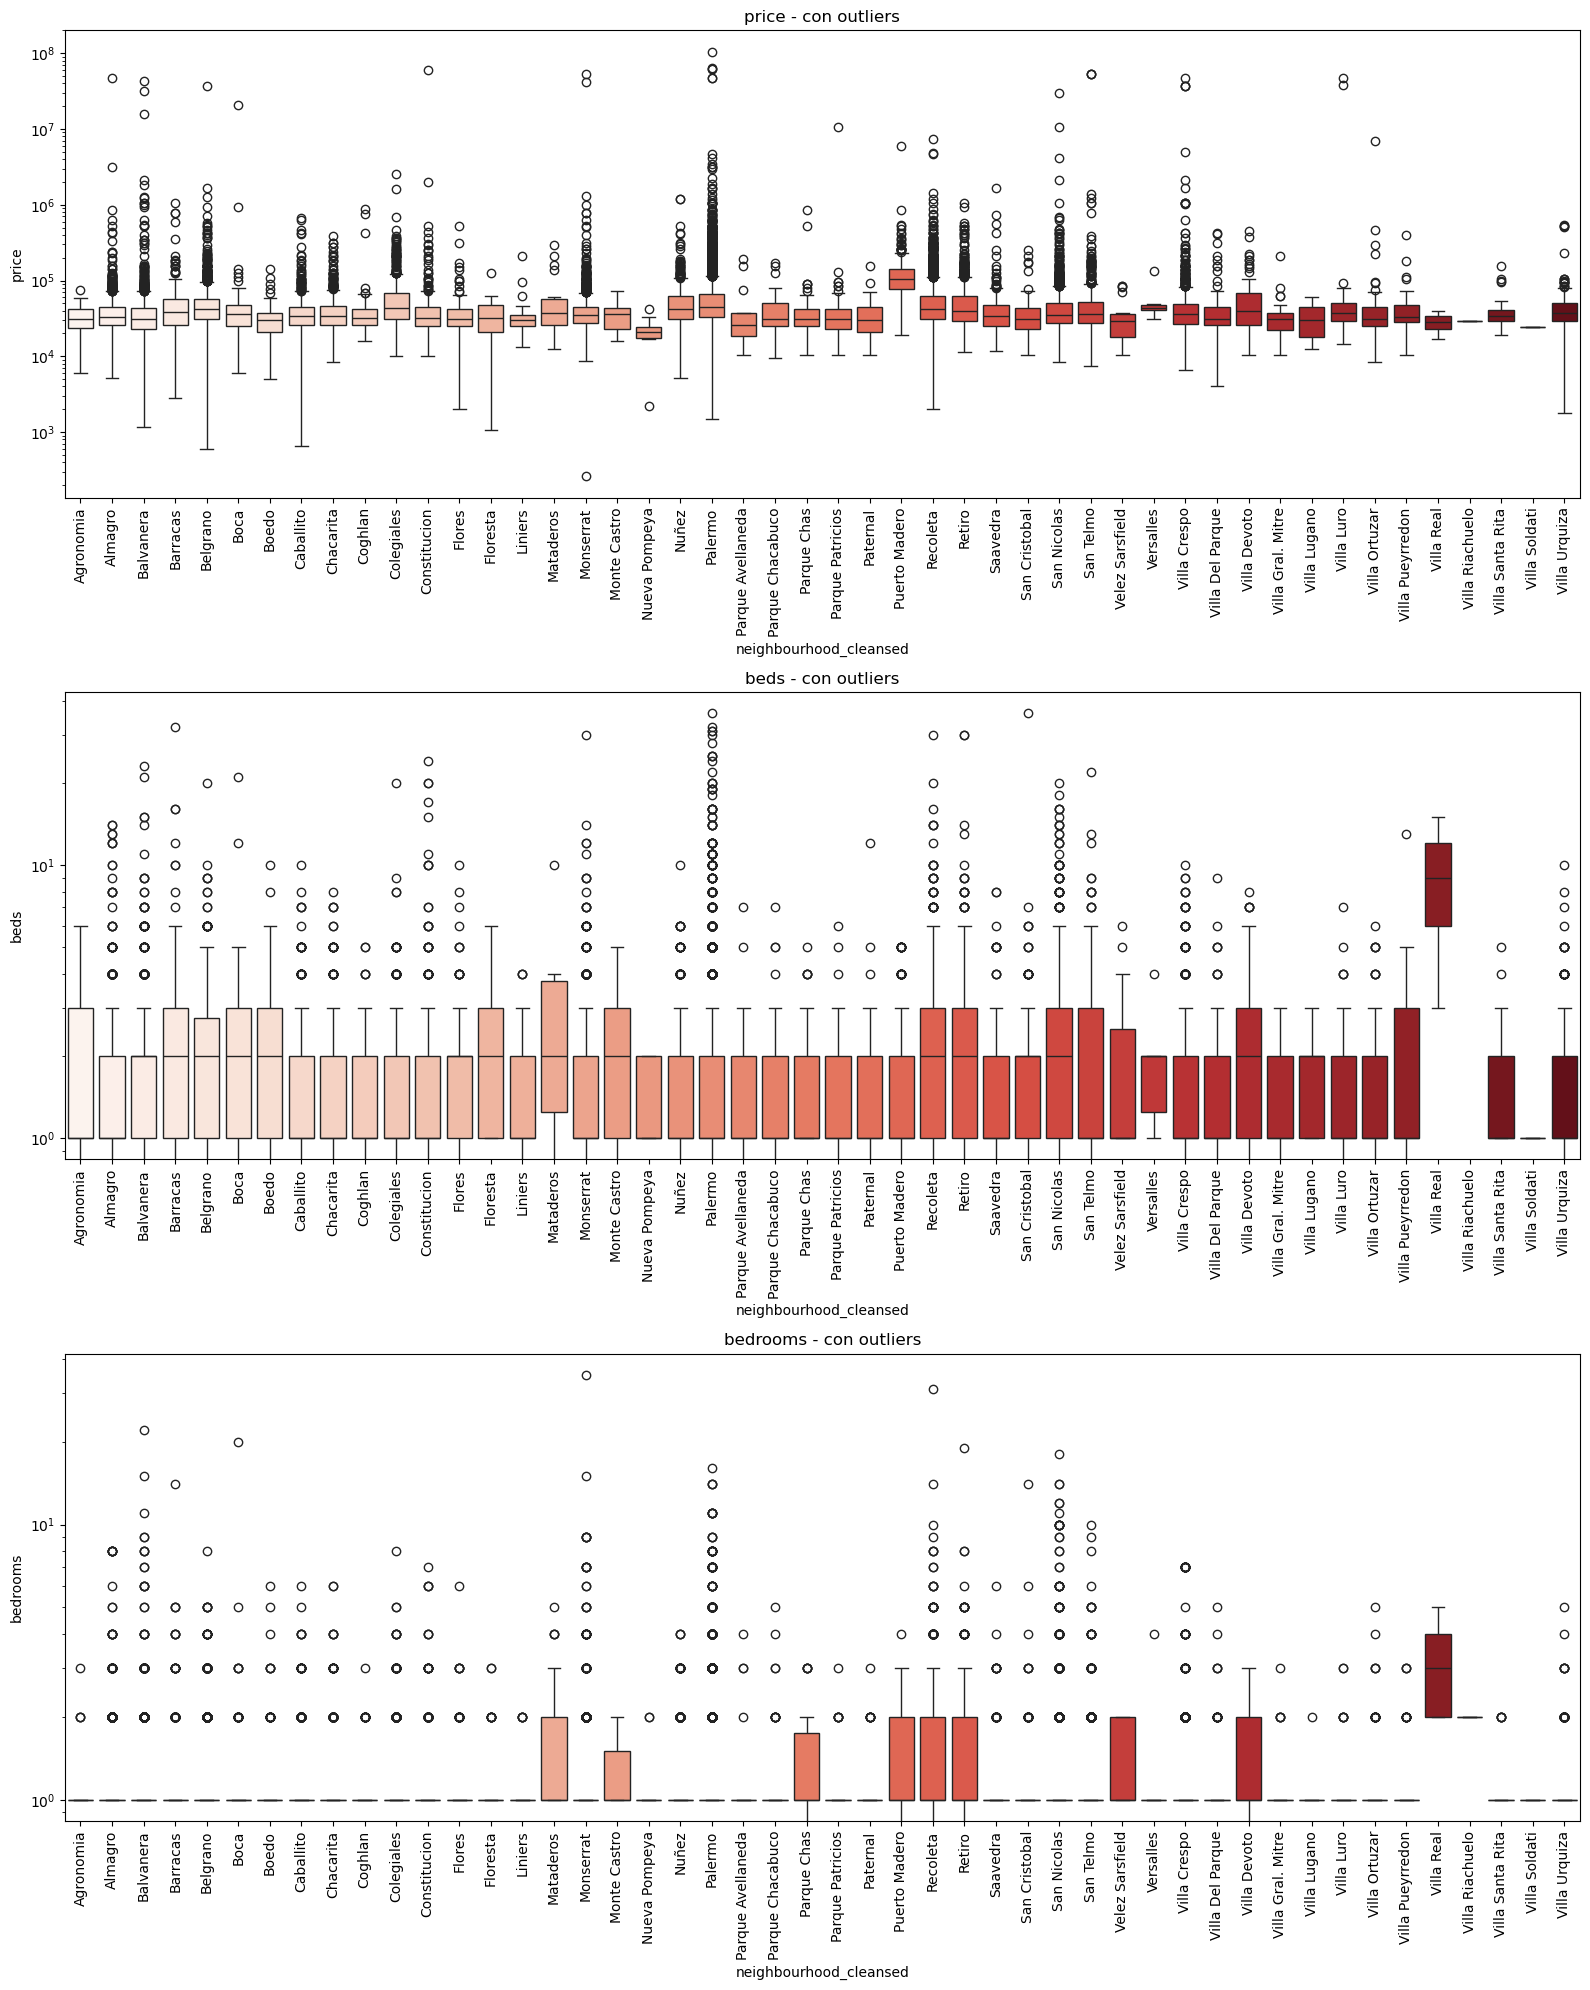

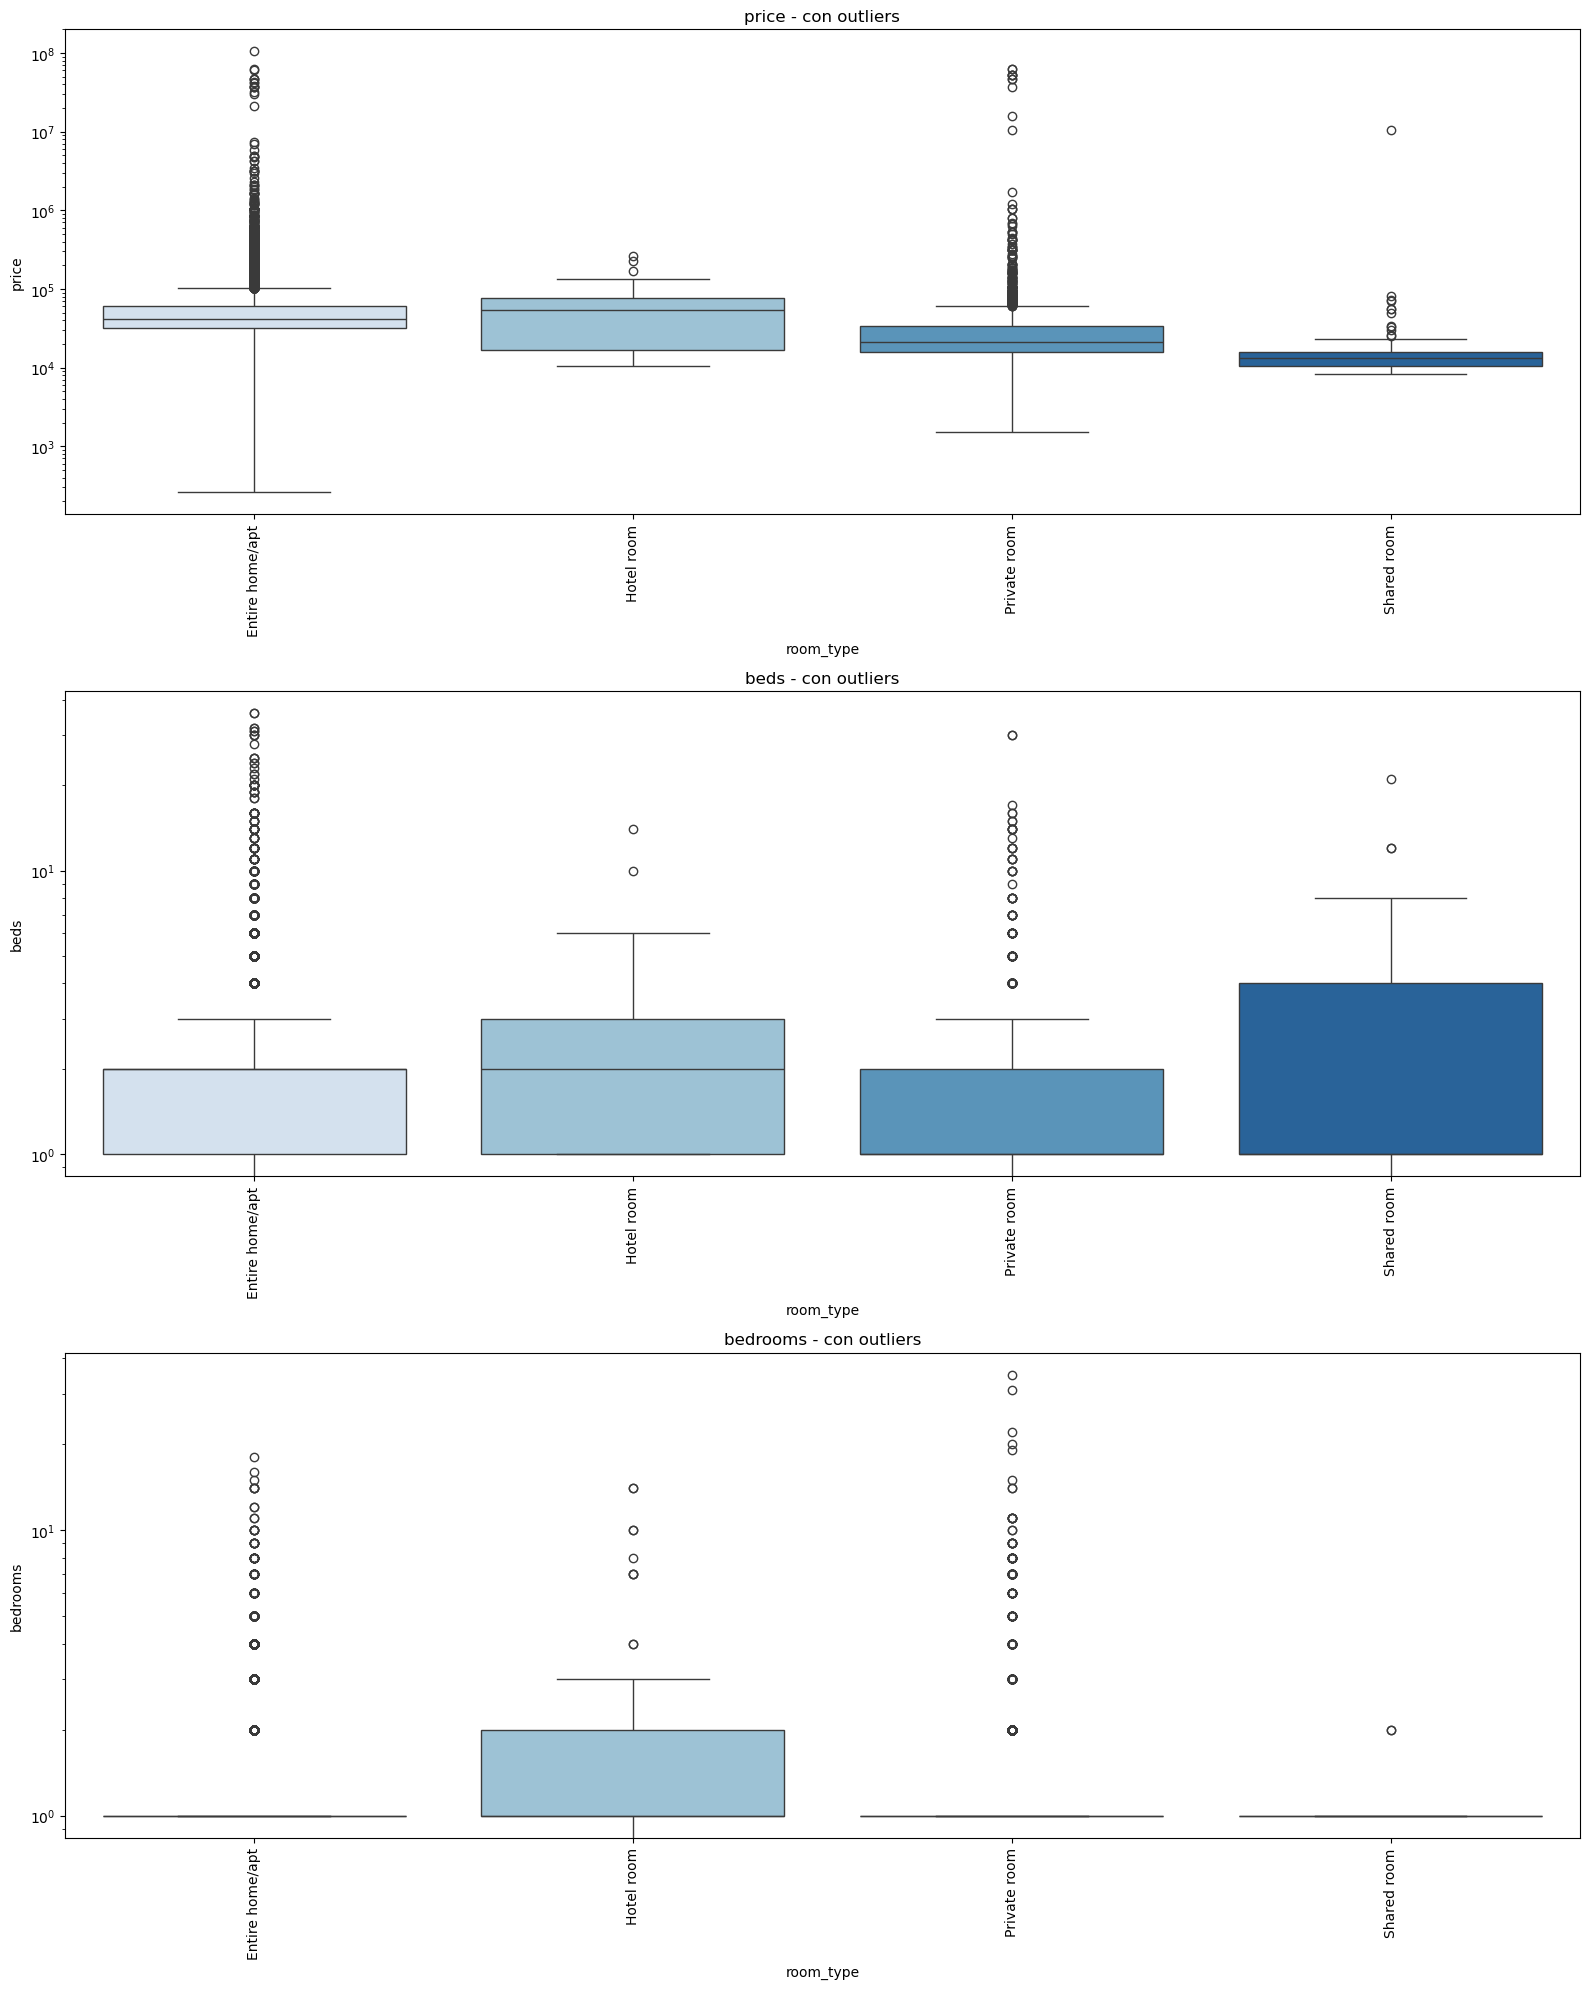

In [ ]:
# Variables de interés
tmp_cols = ['price', 'beds', 'bedrooms']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(tmp_cols):
    sns.boxplot(x='neighbourhood_cleansed', y=col, data=df_eda, ax=axes[i], palette='Reds')
    axes[i].set_title(f'{col} - con outliers')
    axes[i].set_xlabel('neighbourhood_cleansed')
    axes[i].set_ylabel(col)
    axes[i].set_yscale('log')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(tmp_cols):
    sns.boxplot(x='room_type', y=col, data=df_eda, ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} - con outliers')
    axes[i].set_xlabel('room_type')
    axes[i].set_ylabel(col)
    axes[i].set_yscale('log')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Eliminar outliers de las columnas `price`, `beds`, `bedrooms` con quantiles 0.1 y 0.9 agrupando por `room_type` y `neighbourhood_cleansed`

In [ ]:
# funcion para eliminación de outliers
def remove_outliers_grouped (df, col, group_cols):
    idx_total = []
    for key, subdf in df.groupby(group_cols):
        q1 = subdf[col].quantile(0.1)
        q3 = subdf[col].quantile(0.9)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        #mask_outliers = (subdf[col] < lower) | (subdf[col] > upper)
        #print(subdf[mask_outliers].head())
        idx = subdf[(subdf[col].isna()) | ((subdf[col] >= lower) & (subdf[col] <= upper))].index
        idx_total.extend(idx)
    return df.loc[idx_total]

for col in ['price', 'beds', 'bedrooms']:
    df_clean = remove_outliers_grouped(df_clean, col, ['room_type', 'neighbourhood_cleansed'])

In [ ]:
df_clean['price'].describe(percentiles=[.01,.05,.1,.9, .95, .99])

count    3.056000e+04
mean     4.811492e+04
std      6.729802e+04
min      2.600000e+02
1%       1.260300e+04
5%       1.995400e+04
10%      2.310500e+04
50%      3.905800e+04
90%      8.401700e+04
95%      1.050220e+05
99%      1.625114e+05
max      1.062220e+07
Name: price, dtype: float64

Revisar los outliers faltantes

In [ ]:
df_temp = df_clean[(df_clean['price'] >= 1e+06) | (df_clean['price'] <= 1e+03)]
df_temp.head(100)

# Son valores aparentemente incorrectos: ¿10M de pesos un cuarto compartido? ¿650 pesos un loft entero?s

,host_id,price,room_type,property_type,neighbourhood_cleansed,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,instant_bookable,latitude,longitude
3116,6869264,600.0,Entire home/apt,Entire rental unit,Belgrano,2,1.0,2.0,1,500,2,6,4.5,3.33,5.0,5.0,5.0,0.07,False,-34.56781,-58.45642
5515,152011103,650.0,Entire home/apt,Entire rental unit,Caballito,2,0.0,1.0,730,1125,358,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-34.61885,-58.44832
893,11048443,260.0,Entire home/apt,Entire loft,Monserrat,2,1.0,1.0,180,180,5,2,5.0,4.50,5.0,5.0,5.0,0.02,False,-34.60878,-58.37674
34011,587339820,10622200.0,Shared room,Shared room in home,Parque Patricios,2,1.0,1.0,1,365,365,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-34.63778,-58.39562


Al ser datos aparentemente incorrectos se eliminan por ser solo 4 filas.

In [ ]:
df_clean = df_clean[(df_clean['price'] > 1e+03) & (df_clean['price'] < 1e+06)]
df_clean.head(100)

,host_id,price,room_type,property_type,neighbourhood_cleansed,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,instant_bookable,latitude,longitude
4061,191042082,36758.0,Entire home/apt,Entire rental unit,Agronomia,2,1.0,3.0,3,1125,73,15,4.67,4.67,5.00,5.00,5.00,0.20,False,-34.592970,-58.492990
6558,137427072,37000.0,Entire home/apt,Entire rental unit,Agronomia,3,0.0,2.0,3,180,179,15,4.93,4.73,4.80,4.93,4.80,0.22,False,-34.596500,-58.488490
8899,385856273,28356.0,Entire home/apt,Entire rental unit,Agronomia,2,1.0,1.0,2,1125,328,67,4.87,4.73,4.93,4.97,4.88,1.39,False,-34.597260,-58.482780
10169,895346,74475.0,Entire home/apt,Entire rental unit,Agronomia,4,2.0,3.0,3,27,168,17,4.82,4.94,4.94,4.88,4.82,0.47,False,-34.596390,-58.486430
10609,225695530,43809.0,Entire home/apt,Entire rental unit,Agronomia,2,1.0,1.0,2,90,364,1,5.00,4.00,4.00,5.00,4.00,0.05,False,-34.592950,-58.496740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,115628139,36758.0,Entire home/apt,Entire rental unit,Almagro,2,1.0,1.0,21,120,363,25,4.60,4.72,5.00,4.96,4.92,0.27,False,-34.599953,-58.417995
2897,115628139,42009.0,Entire home/apt,Entire rental unit,Almagro,4,4.0,4.0,21,90,358,6,5.00,5.00,5.00,5.00,5.00,0.07,False,-34.601440,-58.416620
2930,135273796,55063.0,Entire home/apt,Entire loft,Almagro,2,0.0,1.0,7,28,4,52,4.85,4.62,4.96,5.00,4.73,0.57,False,-34.597880,-58.423580
3022,114172519,27306.0,Entire home/apt,Entire condo,Almagro,2,1.0,0.0,14,90,355,6,4.67,4.83,5.00,4.83,4.67,0.07,False,-34.606983,-58.426964


Visualización de boxplots sin outliers de `price`, `beds`, `bedrooms` agrupando por `neighbourhood_cleansed`

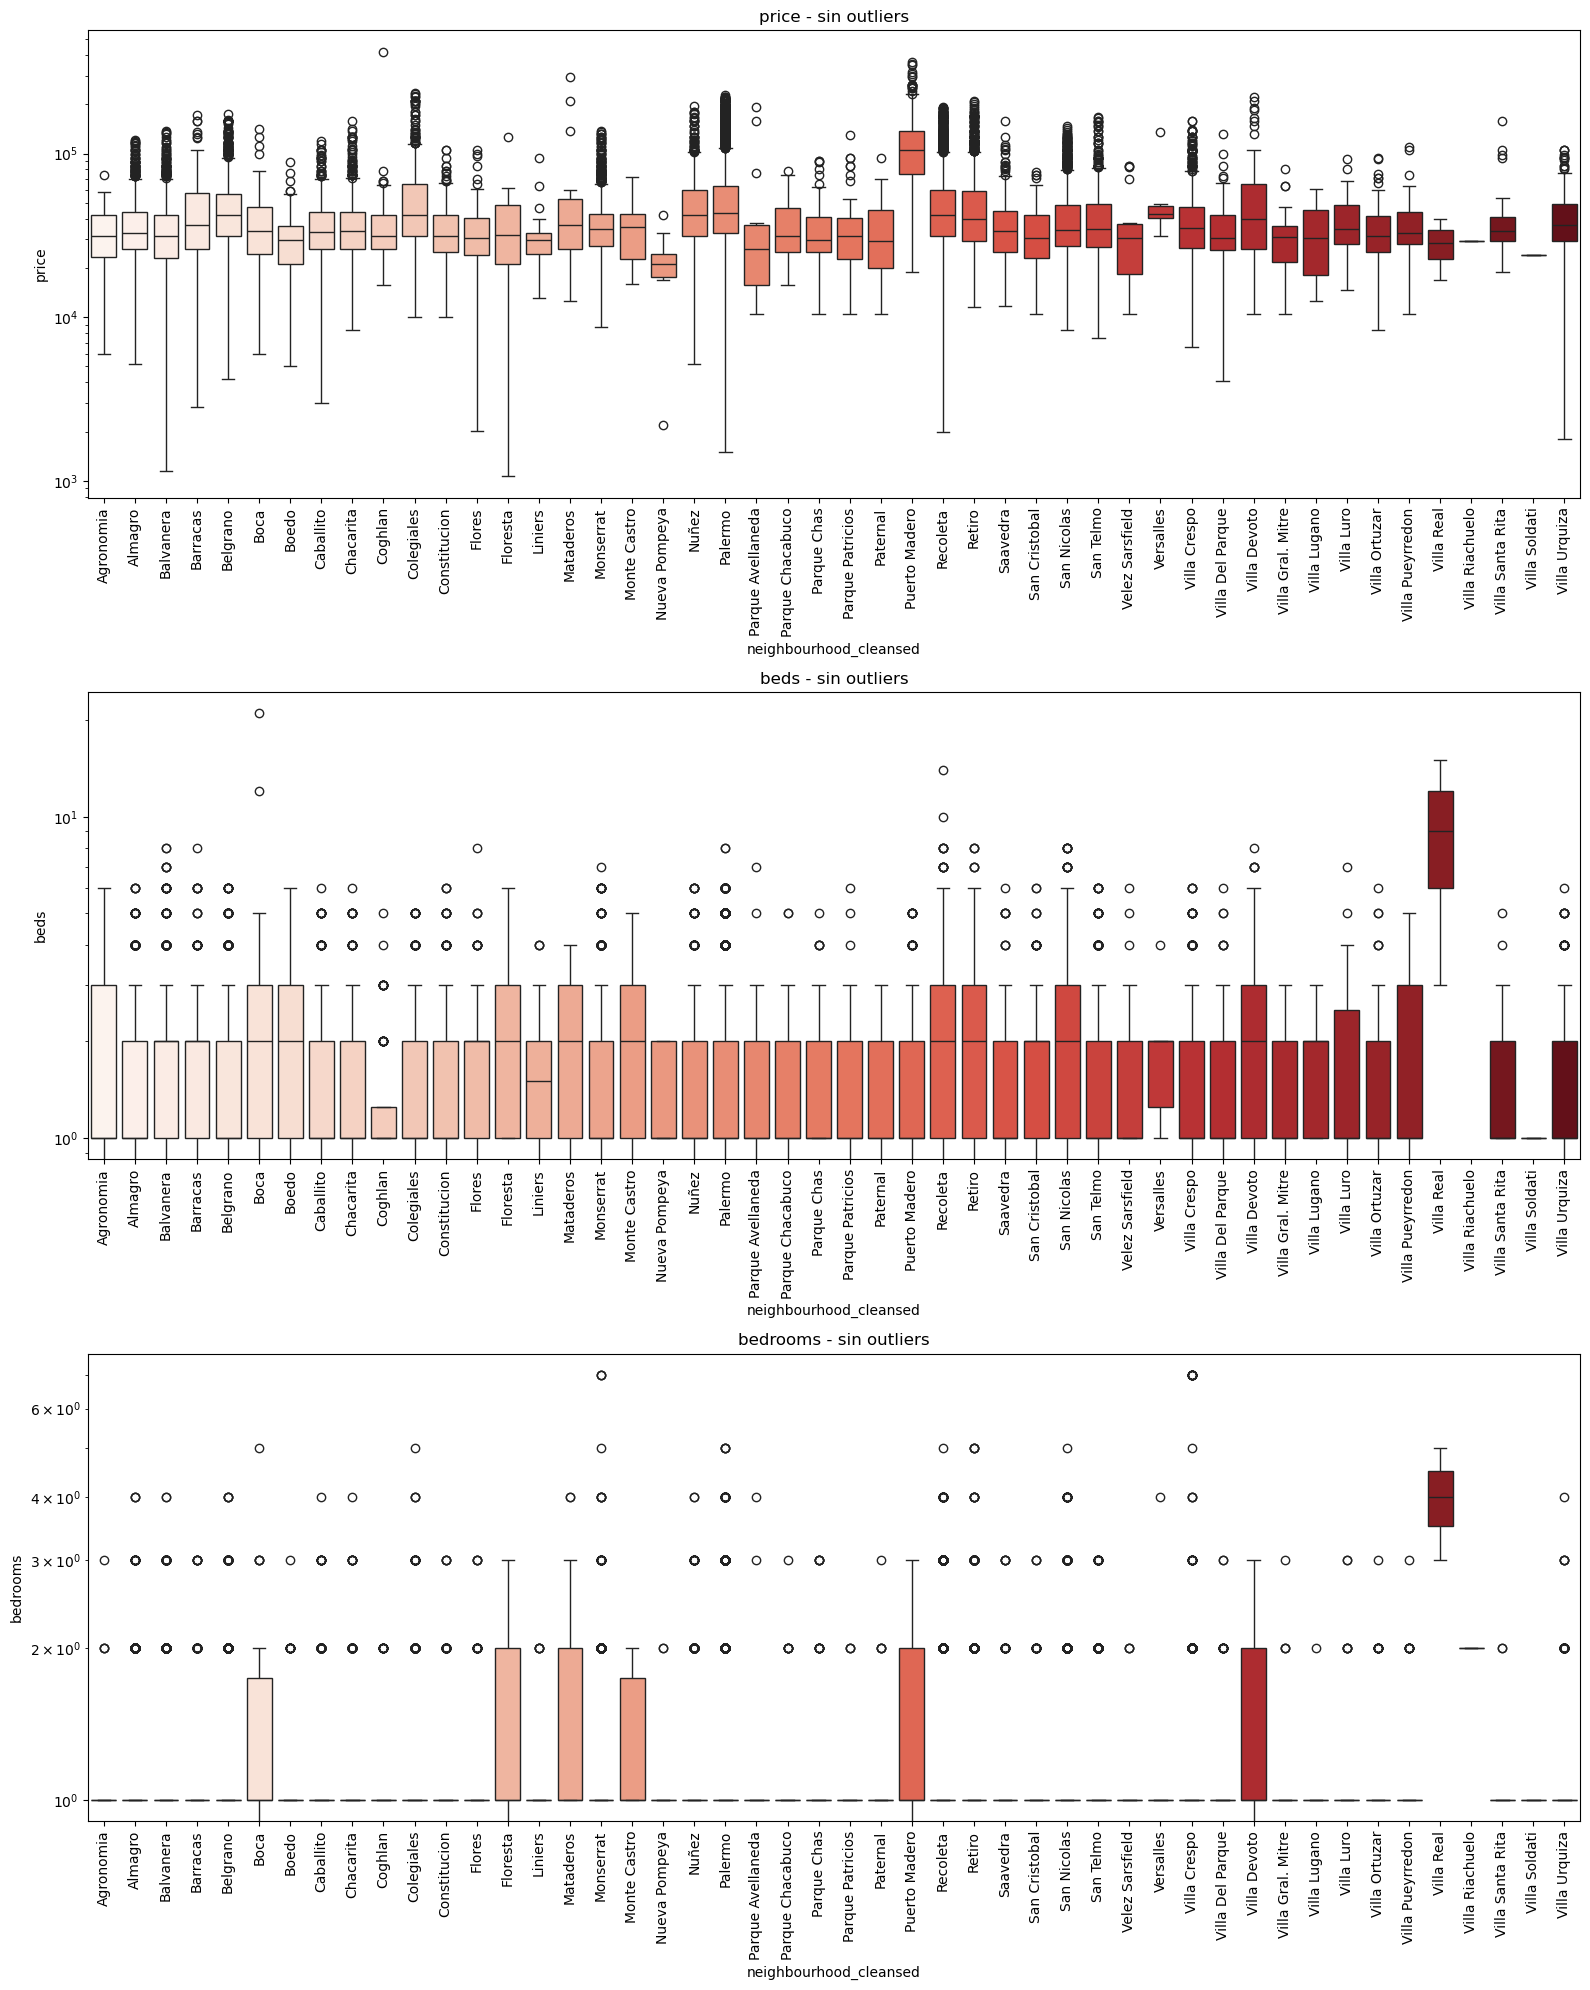

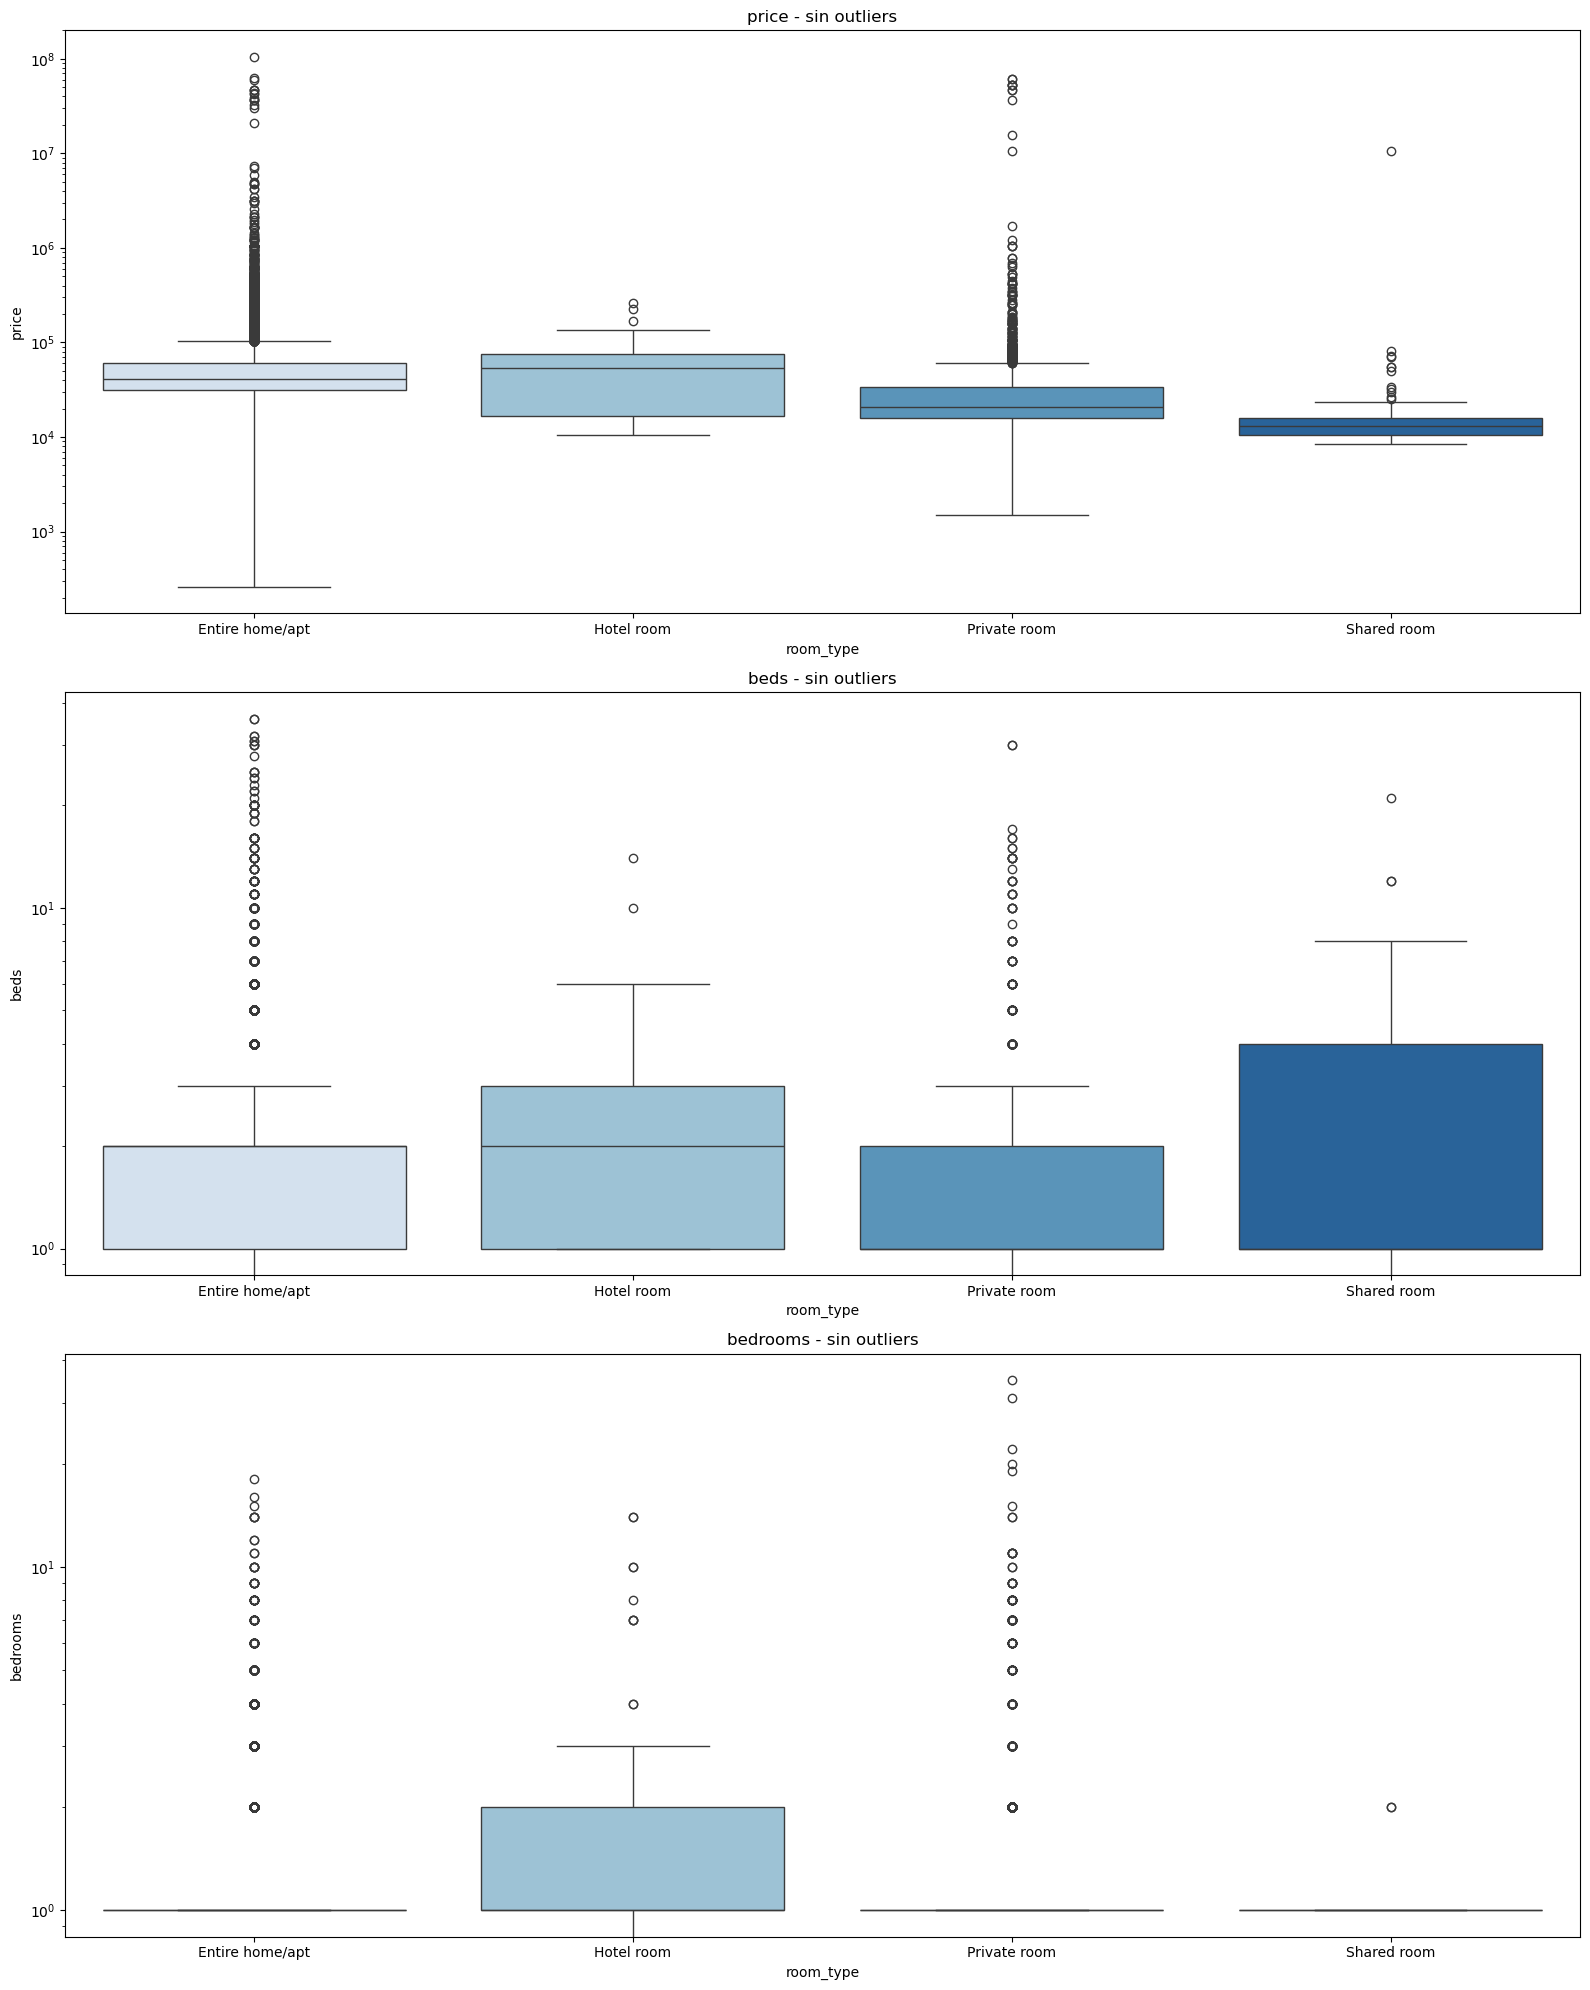

In [ ]:
# Variables de interés
tmp_cols = ['price', 'beds', 'bedrooms']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(tmp_cols):
    sns.boxplot(x='neighbourhood_cleansed', y=col, data=df_clean, ax=axes[i], palette='Reds')
    axes[i].set_title(f'{col} - sin outliers')
    axes[i].set_xlabel('neighbourhood_cleansed')
    axes[i].set_ylabel(col)
    axes[i].set_yscale('log')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(tmp_cols):
    sns.boxplot(x='room_type', y=col, data=df_eda, ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} - sin outliers')
    axes[i].set_xlabel('room_type')
    axes[i].set_ylabel(col)
    axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

Imputación a partir de la visualización

In [ ]:
# - Según gráficas, existe bastante dispersión para beds y bedrooms, por lo que la mediana sería el valor estadístico más
#   robusto para imputar.
# - En el caso de prices, se puede utilizar la media para imputar

df_clean['price'] = df_clean.groupby(['neighbourhood_cleansed', 'room_type'])['price'].transform(lambda x: x.fillna(x.mean()))

for col in ['beds', 'bedrooms']:
    df_clean[col] = df_clean.groupby(['neighbourhood_cleansed', 'room_type'])[col].transform(lambda x: x.fillna(x.median()))

Visualización de boxplots de columnas "`reviews`"

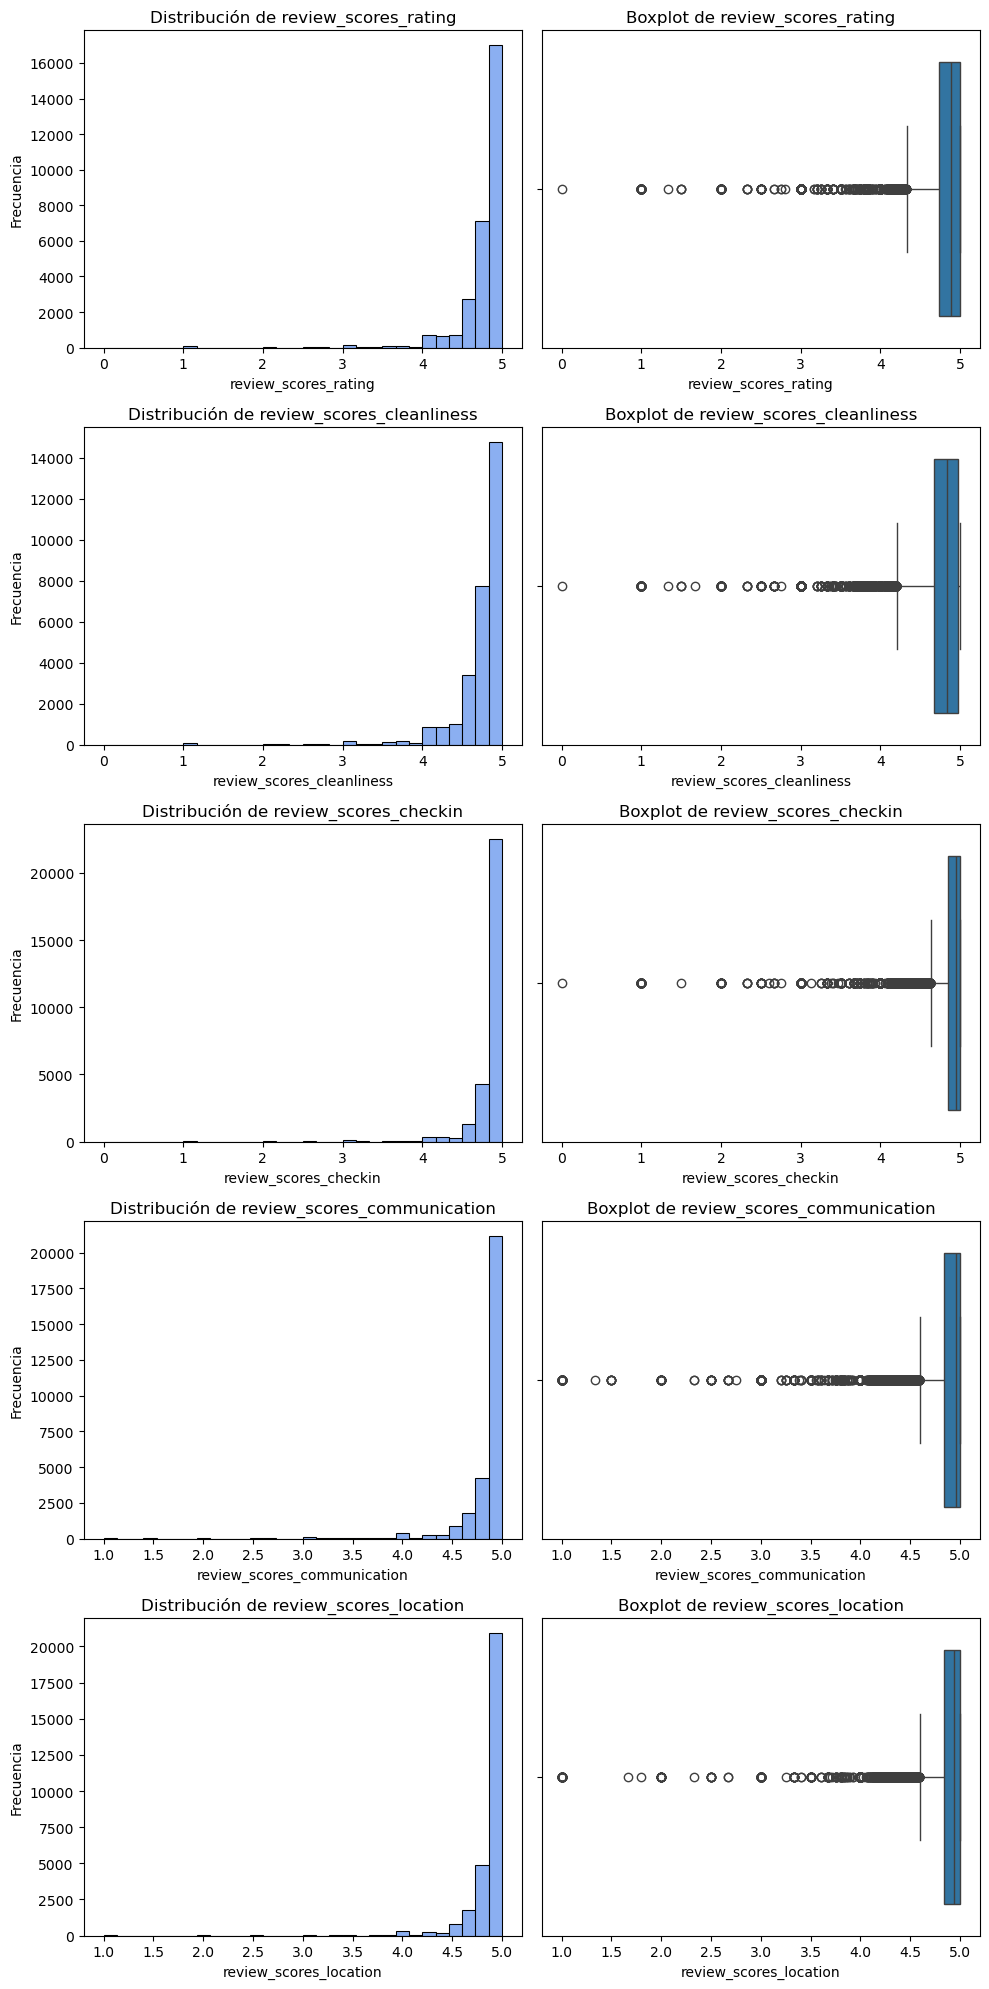

In [ ]:
# Variables de interés
# No se agrupa, ya que los reviews no necesariamente son afectados por el lugar o el tipo de alojamiento
tmp_cols = ['review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']

n = len(tmp_cols)
cols = 2
rows = math.ceil(n*2 / cols)  

plt.figure(figsize=(cols * 5, rows * 4))  

for i, col in enumerate(tmp_cols):
    plt.subplot(rows, cols, i*2 + 1)  
    sns.histplot(df_eda[col].dropna(), kde=False, bins=30, color='cornflowerblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.subplot(rows, cols, i*2+2)
    sns.boxplot(x=df_eda[col].dropna())
    plt.title(f'Boxplot de {col}')

plt.tight_layout() 
plt.show()

Imputación a partir de la visualización

In [ ]:
# Imputar columnas review con la mediana por la dispersión existente

review_cols = ['review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'reviews_per_month']

for col in review_cols:
    df_clean[col] = df_clean[col].fillna(df_eda[col].median())

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30556 entries, 4061 to 19857
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_id                      30556 non-null  category
 1   price                        30556 non-null  float64 
 2   room_type                    30556 non-null  category
 3   property_type                30556 non-null  category
 4   neighbourhood_cleansed       30556 non-null  category
 5   accommodates                 30556 non-null  int64   
 6   bedrooms                     30554 non-null  float64 
 7   beds                         30556 non-null  float64 
 8   minimum_nights               30556 non-null  int64   
 9   maximum_nights               30556 non-null  int64   
 10  availability_365             30556 non-null  int64   
 11  number_of_reviews            30556 non-null  int64   
 12  review_scores_rating         30556 non-null  float64 
 13  rev

Eliminación de filas con `NaN` en columnas críticas después de la imputación

In [ ]:
# Contamos cuántos NaNs tiene cada fila en las columnas críticas
critical_columns = ['price', 'beds', 'bedrooms']

df_clean['missing_count'] = df_clean[critical_columns].isnull().sum(axis=1)

# Distribución de filas según cantidad de NaNs
print(df_clean['missing_count'].value_counts().sort_index())

# Eliminar los que tiene 1 o más NaN en columnas críticas
df_clean = df_clean[df_clean['missing_count'] < 1].copy()
df_clean.info()

missing_count
0    30554
1        2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 4061 to 32405
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_id                      30554 non-null  category
 1   price                        30554 non-null  float64 
 2   room_type                    30554 non-null  category
 3   property_type                30554 non-null  category
 4   neighbourhood_cleansed       30554 non-null  category
 5   accommodates                 30554 non-null  int64   
 6   bedrooms                     30554 non-null  float64 
 7   beds                         30554 non-null  float64 
 8   minimum_nights               30554 non-null  int64   
 9   maximum_nights               30554 non-null  int64   
 10  availability_365             30554 non-null  int64   
 11  number_of_reviews            30554 non-null  int64   
 12  

In [ ]:
percentage_rows = len(df_clean) / len(airbnb_df) * 100
print(f"Se mantuvo el {percentage_rows:.2f}% de las filas originales.")

Se mantuvo el 86.87% de las filas originales.


In [ ]:
import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in df_clean.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in df_clean.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("./datasets/clean_listings_dtypes.json", "w") as f:
    json.dump(info, f)

df_clean.to_csv("./datasets/clean_listings.csv", index=False)
print("DataFrame limpio guardado como 'clean_listings.csv' y los tipos de datos de las columnas en 'clean_listings_dtypes.json'")



DataFrame limpio guardado como 'clean_listings.csv'
